In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit # used for curve fitting 
import numpy as np
from sklearn.discriminant_analysis import StandardScaler

In [2]:
data_frame=pd.read_csv("cars.csv")
# print (data_frame.head()) # first 5 records 
# print (data_frame.tail()) # last 5 records 
# print(data_frame.info())  # oveview about data 
# print(data_frame.describe()) # statistical summary of data
num_features = data_frame.columns.size 
num_examples = data_frame.index.size  
print(f"Number of features: {num_features}")
print(f"Number of examples: {num_examples}")


Number of features: 8
Number of examples: 398


In [3]:
#calculates the number of features (columns) and the number of examples (rows) in a DataFram

In [4]:
# { ---------------------------part two ------------------------------- }
missing= data_frame.isnull().sum()
print("="*55)
print(missing)
print("="*55)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64


In [5]:
# Checking for missing values in each column using isnull()  (Returns 1 if a null value is 
#found and 0 if the value is not null).
''' We cannot determine whether the 6 missing values in the 'horsepower' column and 
the 2 missing values in the 'origin' column are due to a technical error or 
whether they actually indicate a real null value. Further investigation is needed. '''

" We cannot determine whether the 6 missing values in the 'horsepower' column and \nthe 2 missing values in the 'origin' column are due to a technical error or \nwhether they actually indicate a real null value. Further investigation is needed. "

In [6]:
# { --------------------------- part three ------------------------------- }
# impute missing horsepower with median (Numerical var )
data_frame['horsepower'].fillna(data_frame.groupby('cylinders')['horsepower'].transform('median'), inplace=True)
# impute missing origin with mode (categorical var )
data_frame['origin'].fillna(data_frame['origin'].mode()[0] , inplace= True)
#print(data_frame.info()) 

In [7]:
'''From a scientific standpoint, a discernible correlation exists between the number of cylinders in a car 
and its horsepower.
Consequently, to enhance accuracy, the missing values in the 'horsepower' column 
are imputed using the median values calculated within their corresponding 'cylinders' group '''
# The median is chosen over the mean when there is a need for a robust measure of central tendency, particularly
#in the presence of outliers
#Fills missing values in the 'origin' column with the mode (most frequent value)  The mode is used to identify 
#the most frequently occurring value in a dataset, making it valuable for categorical or discrete data.
# and providing a quick summary of the central tendency in the data.


"From a scientific standpoint, a discernible correlation exists between the number of cylinders in a car \nand its horsepower.\nConsequently, to enhance accuracy, the missing values in the 'horsepower' column \nare imputed using the median values calculated within their corresponding 'cylinders' group "

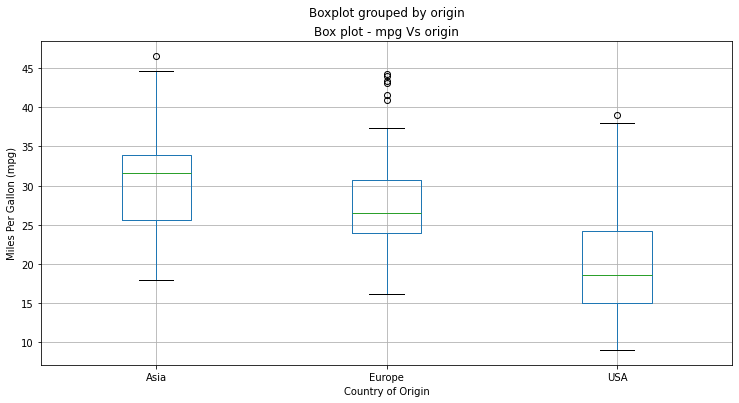

In [8]:
# { --------------------------- part four ------------------------------- }
ax = data_frame.boxplot(column="mpg" , by="origin" , figsize=(12,6))
ax.set_ylabel("Miles Per Gallon (mpg)")
ax.set_title("Box plot - mpg Vs origin")
plt.xlabel("Country of Origin")
plt.show()

In [9]:
# The green line in the plot, recognized as the median and represented by a square, signifies the central point of the data.
# From the box plot, the approximate median values are: Asia = 32, Europe = 27, USA = 19.
''' A higher median value is indicative of a better outcome. Consequently, a higher value along 
this green line in the context of fuel economy suggests that Asian cars generally have
better fuel efficiency.In a box plot, n increasing median, as observed in fuel economy (mpg),
signifies a positive shift in the central tendency. This higher median implies that a larger portion of the
data falls on the higher end of the scale, reinforcing the tendency for cars to exhibit better fuel efficiency.'''

' A higher median value is indicative of a better outcome. Consequently, a higher value along \nthis green line in the context of fuel economy suggests that Asian cars generally have\nbetter fuel efficiency.In a box plot, n increasing median, as observed in fuel economy (mpg),\nsignifies a positive shift in the central tendency. This higher median implies that a larger portion of the\ndata falls on the higher end of the scale, reinforcing the tendency for cars to exhibit better fuel efficiency.'

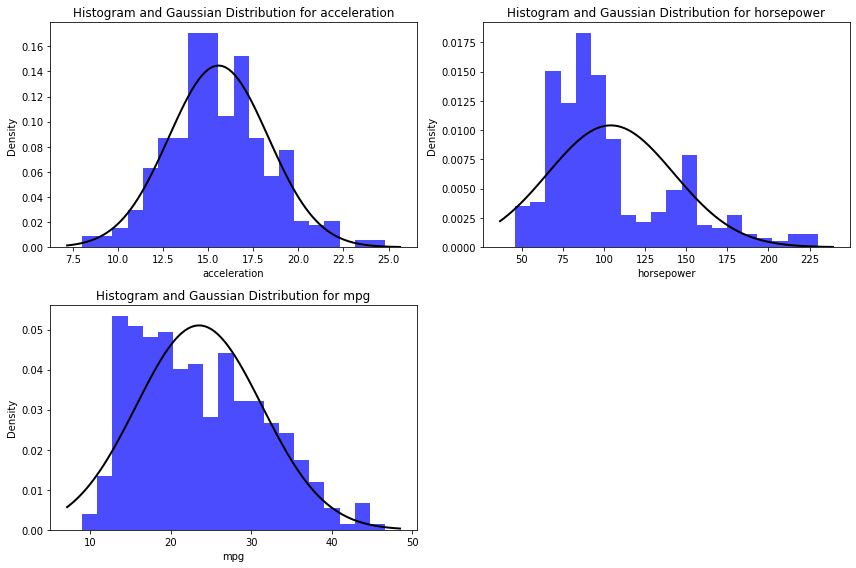

In [10]:
# { --------------------------- part five ------------------------------- }
plt.figure(figsize=(12, 8))
features = ["acceleration", "horsepower", "mpg"]
for i, feature in enumerate(features, 1):
    # Create subplots
    plt.subplot(2, 2, i)
    plt.hist(data_frame[feature], bins=20, density=True, alpha=0.7, color='blue')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = np.exp(-(x - data_frame[feature].mean())**2 / (2 * data_frame[feature].std()**2)) / (np.sqrt(2 * np.pi) * data_frame[feature].std())
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f'Histogram and Gaussian Distribution for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [11]:
# The acceleration feature demonstrates a Gaussian-like distribution, as observed in the plot. 
# The data is concentrated in the middle and gradually decreases towards the sides. Additionally, 
# it exhibits fewer outlier values, contributing to its Gaussian appearance.

In [12]:
# { --------------------------- part Six ------------------------------- }
def calc_skewness(data):
    mean_value = np.mean(data)
    median_value = np.median(data)
    std_deviation = np.std(data)
    # Calculate Bowley Skewness
    return  3 * (mean_value - median_value) / std_deviation
print(f"Bowley Skewness for horsepower : {calc_skewness(data_frame['horsepower'])}")
print(f"Bowley Skewness for acceleration : {calc_skewness(data_frame['acceleration'])}")
print(f"Bowley Skewness for mpg: {calc_skewness(data_frame['mpg'])}")


Bowley Skewness for horsepower : 0.9506453925005227
Bowley Skewness for acceleration : 0.07416661882340907
Bowley Skewness for mpg: 0.19775648700563309


In [13]:
# Skewness Interpretation:
# - Positive Skewness (Right-skewed): Indicates a longer or fatter right tail with the majority of data on the left side, featuring relatively few, but extreme, higher values. This suggests a distribution with a positive skew.
# - Negative Skewness (Left-skewed): Indicates a longer or fatter left tail with the majority of data on the right side, featuring relatively few, but extreme, lower values. This suggests a distribution with a negative skew.
# - Zero Skewness (Symmetric): A skewness value close to zero suggests approximate symmetry, where the left and right sides are roughly mirror images of each other. This suggests a distribution that is relatively balanced and lacks a pronounced skew.
""" ________ Based on the above_________ = > 
- 'horsepower' and 'mpg' exhibit right-skewed distributions, indicating higher values on the right side.
- 'acceleration' has a slight positive skewness around zero,
suggesting a distribution that is Gaussian distribution as we see is part {5}  """

" ________ Based on the above_________ = > \n- 'horsepower' and 'mpg' exhibit right-skewed distributions, indicating higher values on the right side.\n- 'acceleration' has a slight positive skewness around zero,\nsuggesting a distribution that is Gaussian distribution as we see is part {5}  "

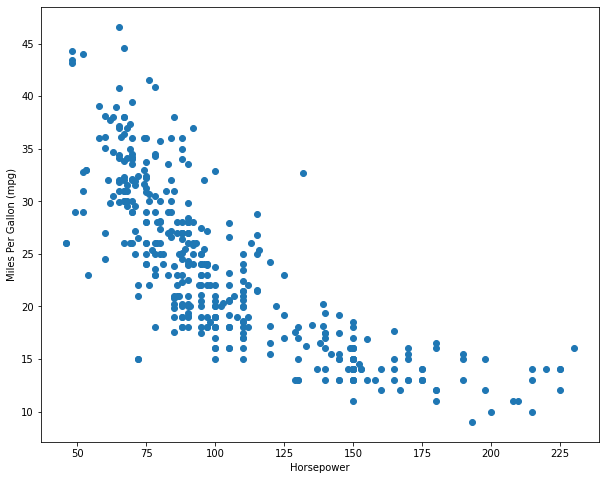

In [14]:
# { --------------------------- part seven ------------------------------- }
plt.figure(figsize=(10,8))
plt.scatter(data_frame['horsepower'],data_frame['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (mpg)')
plt.show()

In [15]:
# scatter plot will tell us how the variable on the x-axis corresponding the values on the y-axis
# This scatter plot illustrates a negative relationship, indicating that as 'horsepower' increases, 'mpg' (miles per gallon) decreases.
""" we can see wheen horsepowe incease the mpg decrease 
so the car have more horsepower its may have lower fuel efficiency.  """

' we can see wheen horsepowe incease the mpg decrease \nso the car have more horsepower its may have lower fuel efficiency.  '

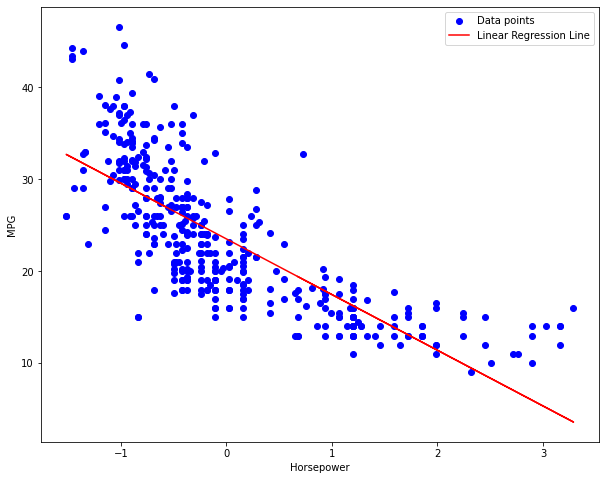

In [16]:
# { --------------------------- part eight ------------------------------- }
scaler = StandardScaler()
data_frame['horsepower'] = scaler.fit_transform(data_frame[['horsepower']])
X = data_frame['horsepower'].values.reshape(-1, 1)  
Y = data_frame['mpg'].values.reshape(-1, 1)
X_with_intercept = np.c_[np.ones(X.shape[0]), X]
theta = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ Y
intercept, slope = theta
# print("Intercept:", intercept)
# print("Slope:", slope)
plt.figure(figsize=(10,8))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, intercept + slope * X, color='red', label='Linear Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

In [17]:
# we Keep moving this line through the data points to make sure the best fit kine has the least square distance 
# between the data points and the regression line
# This code performs simple linear regression using Ordinary Least Squares (OLS) to model the relationship between standardized 'horsepower' and 'mpg'.
# Standardization is applied to 'horsepower' for consistent scaling.
# The data is prepared by reshaping the features to 2D arrays.
# An intercept term is added for the linear regression model.
# Regression coefficients (intercept and slope) are calculated using the OLS formula.
# The original data points and the fitted linear regression line are plotted for visualization.
# The resulting plot illustrates the linear relationship between 'horsepower' and 'mpg', providing insights into how changes in 'horsepower' influence 'mpg'.


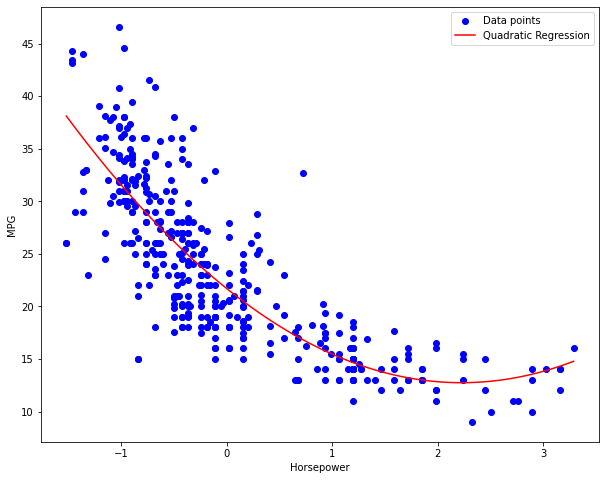

In [18]:

# { --------------------------- part nine ------------------------------- }
X = data_frame['horsepower'].values.reshape(-1, 1)  # Reshape to create a column vector
Y = data_frame['mpg'].values.reshape(-1, 1)
X_with_intercept_and_squared = np.c_[np.ones(X.shape[0]), X, X**2]
# Compute the closed-form solution
theta_quad = np.linalg.inv(X_with_intercept_and_squared.T @ X_with_intercept_and_squared) @ X_with_intercept_and_squared.T @ Y
intercept_quad, slope_quad, coefficient_quad = theta_quad[0], theta_quad[1], theta_quad[2]
# print(theta_quad)
plt.figure(figsize=(10,8))
# Scatter plot of 'horsepower' vs 'mpg'
plt.scatter(X, Y, color='blue', label='Data points')
X_quad = np.linspace(min(X), max(X), 100).reshape(-1, 1)
Y_quad = intercept_quad + slope_quad * X_quad + coefficient_quad * X_quad**2
# Plot the learned quadratic function
plt.plot(X_quad, Y_quad, color='red', label='Quadratic Regression')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()


In [19]:
# This code performs quadratic regression using the closed-form solution.
# 'horsepower' and 'mpg' are reshaped to create column vectors.
# An intercept term and the squared feature ('horsepower^2') are added to the feature matrix.
# The closed-form solution is applied to calculate the coefficients for the quadratic regression model.
#  A scatter plot of 'horsepower' vs 'mpg' is created with blue data points.
# A quadratic curve is generated using the learned coefficients and plotted in red.
# The resulting plot illustrates how the quadratic regression model captures a more complex relationship between 'horsepower' and 'mpg'.


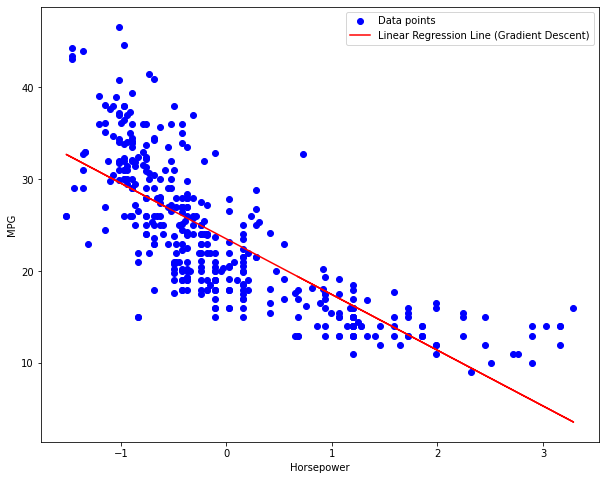

In [20]:

# { --------------------------- part ten ------------------------------- }
X = data_frame['horsepower'].values.reshape(-1, 1) 
Y = data_frame['mpg'].values.reshape(-1, 1)
X_with_intercept = np.c_[np.ones(X.shape[0]), X]
theta = np.zeros((2, 1))  
alpha = 0.0001  # Learning rate
iterations = 900000  # Number of iterations
plt.figure(figsize=(10,8))
# Gradient Descent
for _ in range(iterations):
    error = X_with_intercept @ theta - Y
    gradient = X_with_intercept.T @ error
    theta -= alpha * gradient / len(Y)
intercept, slope = theta
# print(theta)
# Scatter plot of 'horsepower' vs 'mpg'
plt.scatter(X, Y, color='blue', label='Data points')
# Plot the learned line
plt.plot(X, intercept + slope * X, color='red', label='Linear Regression Line (Gradient Descent)')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
# plt.show()

In [21]:
# This code performs linear regression using the gradient descent algorithm.
# 'horsepower' and 'mpg' are reshaped to create column vectors.
# An intercept term is added to the feature matrix.
# Initial values for the model parameters (theta) are set to zeros.
#Learning rate (alpha) and the number of iterations are defined.
# Gradient descent is applied to update the model parameters iteratively.
# A scatter plot of 'horsepower' vs 'mpg' is created with blue data points.
# The learned linear regression line using gradient descent is plotted in red.
# The resulting plot illustrates the linear regression model learned through the gradient descent optimization process.
